<a href="https://colab.research.google.com/github/antmaio/Creactif_Fastai/blob/main/Fastai_Seance4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *

## Rappel structure datablock

In [ ]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),  # définition du TYPE d'entrée / sortie
                 get_items=get_image_files,           # définition du CHARGEMENT des entrées
                 get_y = label_func,                  # définition du CHARGEMENT des sorties
                 splitter=splitter)                   # définition de la SEPARATION des données

In [ ]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),  
                 get_items=get_image_files,           
                 get_y = label_func,                  
                 splitter=splitter,                  
                 item_tfms=Resize(100))               # Changer la résolution les images pour obtenir une taille de 100x100 pour toutes

# Rappel Dataloader

Le Dataloader prend en entrée une liste d'indices ou de paths

In [ ]:
dls = pets.dataloaders(untar_data(URLs.PETS)/"images", bs=4) #Ici, entrée = liste de paths
dls.show_batch()

# Utilisation de données déjà chargées dans l'environnement

In [ ]:
# téléchargement d'une image web (chat)
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/June_odd-eyed-cat_cropped.jpg/1216px-June_odd-eyed-cat_cropped.jpg 
# téléchargement d'une image web (chien)
!wget https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/golden-retriever-royalty-free-image-506756303-1560962726.jpg

# Récupération des paths
import glob
mes_images = glob.glob("./*.jpg")
print("les images s'appellent: ", mes_images)

# On place toutes les images (matrices 3D) dans une liste
from torchvision.io import read_image
im_list = [] # créer une liste vide
for _,item in enumerate(mes_images):
  mon_image = read_image(item)
  im_list.append(mon_image)

# définition des catégories
cat = [1, 0] # la 1ère image est un chat et la 2ème est un chien

# Exercice 1:

Prédéterminer, sans code, la taille de la liste et estimer la shape des éléments à l'intérieur.

Comment vérifier la réponse ?

In [ ]:
# votre code

In [41]:
# On définit un nouveau dataloader
def my_dataloader(liste_entree, cat_sortie):
  def pass_indices(indices):    # par défaut, "dblock.dataloaders" prend une liste d'indices en argument, il faut définir comment les gérer
    return indices

  def get_x(idx):         # comment charger les inputs
    im = liste_entree[idx][:,:512,:512] # on coupe l'image à la taille voulue
    return im

  def get_y(idx):         # comment charger les outputs
    return cat_sortie[idx]

  # on crée le DataBlock (note: pas besoin de splitter parce qu'on a que 2 images donc pas assez pour entrainement/validation)
  dblock = DataBlock( blocks=(TransformBlock, CategoryBlock),
                      get_items=pass_indices,
                      get_x=get_x,
                      get_y=get_y
                      )
  
  nombre_images = len(liste_entree) #la première dimension du tensor d'entrée nous donne le nombre d'éléments à traiter
  dls = dblock.dataloaders(list(range(nombre_images)), bs=2) 

  return dls

# 4) on crée le dataloader
dls = my_dataloader(im_list, cat)
print(dls.one_batch()[0].shape)

torch.Size([2, 3, 512, 512])


torch.Size([2, 3, 512, 512])


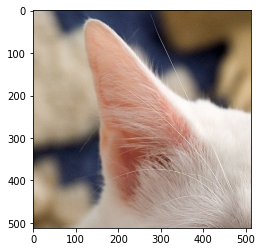

In [42]:
batch1 = dls.one_batch()[0] # prendre l'input d'un batch
print(batch1.shape)
b = batch1[0]               # prendre le 1er élément du batch 
b = b.permute(1,2,0)        # permuter pour satistifaire les dimensions requise par plt.imshow
plt.imshow(b)
plt.show()

# Exercice 2

Au lieu de couper l'image, changez sa taille en changeant la résolution grâce à la fonction "resize" de torchvision.transform.functional

ET afficher une image du batch

In [39]:
from ''' VOTRE CODE ''' import resize

# On définit un nouveau dataloader
def my_dataloader2(liste_entree, cat_sortie):
  def pass_indices(indices):    # par défaut, "dblock.dataloaders" prend une liste d'indices en argument, il faut définir comment les gérer
    return indices

  def get_x(idx):         # comment charger les inputs
    ''' VOTRE CODE '''
    return im

  def get_y(idx):         # comment charger les outputs
    return cat_sortie[idx]

  # on crée le DataBlock (note: pas besoin de splitter parce qu'on a que 2 images donc pas assez pour entrainement/validation)
  dblock = DataBlock( blocks=(TransformBlock, CategoryBlock),
                      get_items=pass_indices,
                      get_x=get_x,
                      get_y=get_y
                      )
  
  nombre_images = len(liste_entree) #la première dimension du tensor d'entrée nous donne le nombre d'éléments à traiter
  dls = dblock.dataloaders(list(range(nombre_images)), bs=2) 

  return dls

# 4) on crée le dataloader
dls = my_dataloader2(im_list, cat)
print(dls.one_batch()[0].shape)

torch.Size([2, 3, 512, 512])


torch.Size([2, 3, 512, 512])


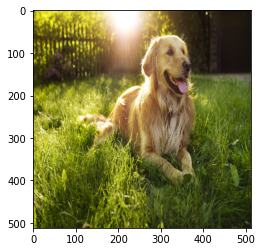

In [40]:
''' VOTRE CODE ''' # afficher une image du batch

# Normalisation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  """


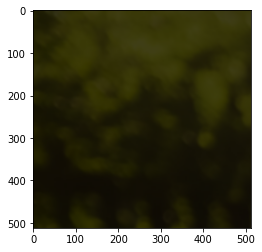

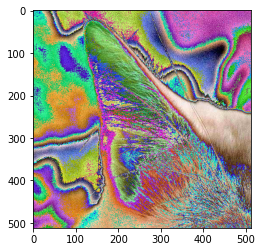

In [46]:
batch0 = dls.one_batch()[0] # prendre l'input d'un batch
item0 = batch0[0]
item1 = batch0[1]

item0 = item0//4
item1 = item1*4

plt.imshow(item0.permute(1,2,0)) #chien
plt.show()
plt.imshow(item1.permute(1,2,0)) #chat
plt.show()

In [ ]:
# l'image ne s'affiche pas correctement... Cela est dû au fait que les matrices
# considérées comme des images doivent avoir des valeurs de pixel entre [0 et 1]
# ou bien entre [0 et 255]
# => on doit NORMALISER notre matrices
b = b/b.max() # on divise toutes les valeurs du tensor par le maximum pour avoir des valuers finales entre [0 et 1]
plt.imshow(b)
plt.show()

In [ ]:
import fastai.vision.models.tvm as tvm
dir(tvm)

In [ ]:
tvm.googlenet()

In [ ]:
mon_dataloader = dls
mon_model = resnet34
ma_metrique = accuracy

mon_learner = Learner(dls=mon_dataloader, model=mon_model, metrics=ma_metrique)

Les infos à mettre dans le learner sont reprises dans la doc

In [ ]:
Learner?? #Permet d'afficher la doc sur Colab

In [ ]:
mon_learner = Learner(mon_dataloader, mon_model, ma_metrique) #erreur car metrcis n'est pas un positional argument

In [ ]:
mon_learner = Learner(mon_dataloader, mon_model, metrics=ma_metrique)